# <span style="font-variant:small-caps;"><font color=#DAA6E4 size=12>BDT Variable Exploration</font></span>

This notebook should present the distributions of signal and data within control regions.

[This link](https://cms-analysis.github.io/HiggsAnalysis-CombinedLimit/part2/settinguptheanalysis/) will show you how to format the data cards and enter them into HiggsCombine.

In [1]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [2]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [3]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [4]:
dat_6sums = ak.sum(datTree.t6_jet_btag, axis=1)/6

In [5]:
#### DATA ####
dat_6jNN_mask = datTree.b_6j_score > cut_6jNN # pass 6jNN mask

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125
dat_Dm_pos  = ak.all(datTree.t6_higgs_m - 125 > 0, axis=1)
dat_Dm_neg  = ak.all(datTree.t6_higgs_m - 125 < 0, axis=1)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

In [6]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

In [7]:
score_cut = 0.66

#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < score_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= score_cut # hs

# combination
dat_CRls_mask = dat_6jNN_mask & dat_CR & dat_ls_mask
dat_CRhs_mask = dat_6jNN_mask & dat_CR & dat_hs_mask
dat_VRls_mask = dat_6jNN_mask & dat_VR & dat_ls_mask
dat_VRhs_mask = dat_6jNN_mask & dat_VR & dat_hs_mask
dat_SRls_mask = dat_6jNN_mask & dat_SR & dat_ls_mask

In [8]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)
TF

0.13811089692708925

In [9]:
from hep_ml import reweight
from pandas import DataFrame

In [73]:
def get_df(mask, cr=False):
    H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][mask].to_numpy()
    H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][mask].to_numpy()
    H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][mask].to_numpy()
    H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][mask].to_numpy()
    H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][mask].to_numpy()
    H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][mask].to_numpy()
    H1_pt = datTree.t6_higgs_pt[:,0][mask].to_numpy()
    H2_pt = datTree.t6_higgs_pt[:,1][mask].to_numpy()
    H3_pt = datTree.t6_higgs_pt[:,2][mask].to_numpy()
    H1_eta = datTree.t6_higgs_eta[:,0][mask].to_numpy()
    H2_eta = datTree.t6_higgs_eta[:,1][mask].to_numpy()
    H3_eta = datTree.t6_higgs_eta[:,2][mask].to_numpy()
    H1_dr = datTree.t6_higgs_dr[:,0][mask].to_numpy()
    H2_dr = datTree.t6_higgs_dr[:,1][mask].to_numpy()
    H3_dr = datTree.t6_higgs_dr[:,2][mask].to_numpy()
    H1_m = datTree.t6_higgs_m[:,0][mask].to_numpy()
    H2_m = datTree.t6_higgs_m[:,1][mask].to_numpy()
    H3_m = datTree.t6_higgs_m[:,2][mask].to_numpy()

    data = np.column_stack((H1_b1_pt, H1_b2_pt, H2_b1_pt, H2_b2_pt, H3_b1_pt, H3_b2_pt, H1_pt, H2_pt, H3_pt, H1_dr, H2_dr, H3_dr, H1_eta, H2_eta, H3_eta, H1_m, H2_m, H3_m))

    cols = ['H1 b1 pt','H1 b2 pt','H2 b1 pt','H2 b2 pt','H3 b1 pt','H3 b1 pt','H1 pt','H2 pt','H3 pt','H1 dr','H2 dr','H3 dr','H1 eta','H2 eta','H3 eta','H1 m','H2 m','H3 m']

    if cr:
        return DataFrame(data=data, columns=cols), data
    else:
        return DataFrame(data=data, columns=cols)

In [75]:
crls_df, crls_vars = get_df(dat_CRls_mask, cr=True)
crhs_df, crhs_vars = get_df(dat_CRhs_mask, cr=True)
vrls_df = get_df(dat_VRls_mask)
vrhs_df = get_df(dat_VRhs_mask)

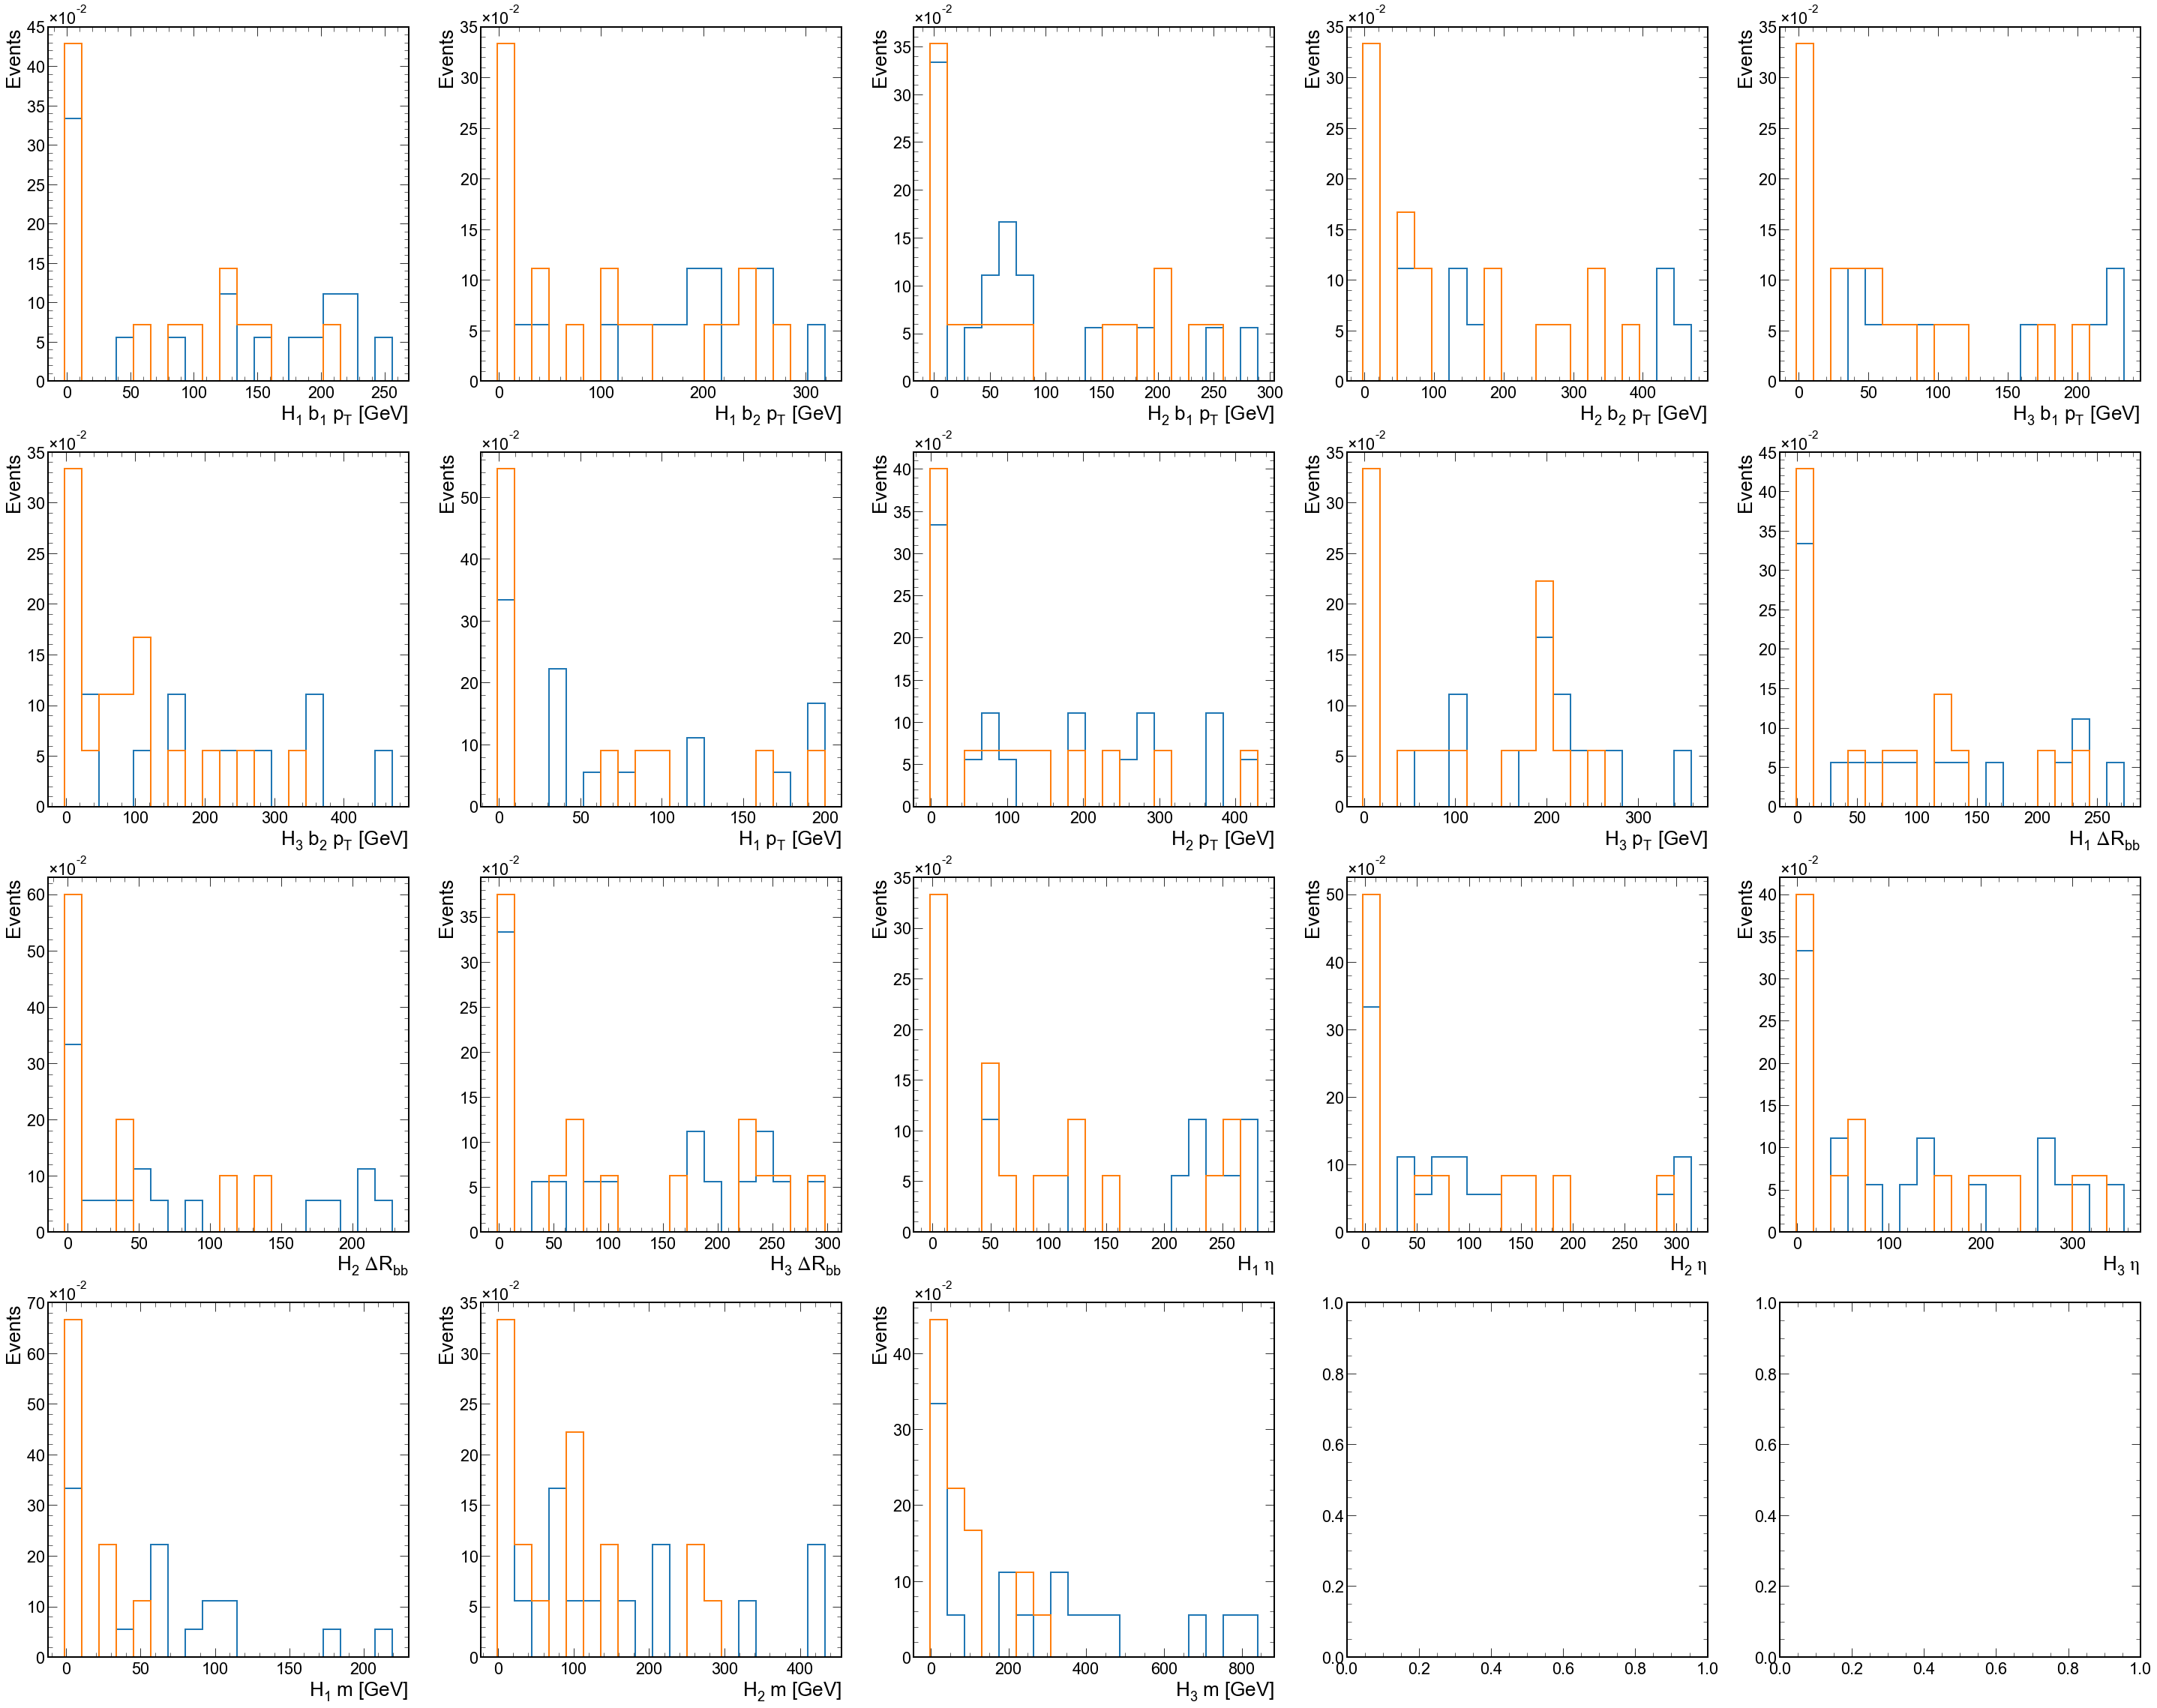

In [76]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(50,40))

labels = [r'$H_1 \;b_1\; p_T$ [GeV]',
          r'$H_1 \;b_2\; p_T$ [GeV]',
          r'$H_2 \;b_1\; p_T$ [GeV]',
          r'$H_2 \;b_2\; p_T$ [GeV]',
          r'$H_3 \;b_1\; p_T$ [GeV]',
          r'$H_3 \;b_2\; p_T$ [GeV]',
          r'$H_1 \;p_T$ [GeV]',
          r'$H_2 \;p_T$ [GeV]',
          r'$H_3 \;p_T$ [GeV]',
          r'$H_1 \;\Delta R_{bb}$',
          r'$H_2 \;\Delta R_{bb}$',
          r'$H_3 \;\Delta R_{bb}$',
          r'$H_1 \;\eta$',
          r'$H_2 \;\eta$',
          r'$H_3 \;\eta$',
          r'$H_1 \;m$ [GeV]',
          r'$H_2 \;m$ [GeV]',
          r'$H_3 \;m$ [GeV]'
          ]

for crhs,crls,label,ax in zip(crhs_vars,crls_vars,labels,axs.flatten()):

    xmin = min(ak.min(crhs),ak.min(crls))
    xmax = max(ak.max(crhs),ak.max(crhs))

    n,e = Hist(crhs, bins=np.linspace(xmin, xmax, 20), ax=ax, density=1, label='Target')
    n,e = Hist(crls, bins=np.linspace(xmin, xmax, 20), ax=ax, density=1, label='CR ls')

    ax.set_xlabel(label)
    ax.set_ylabel('Events')

fig.savefig("plots/Data/BDT_vars.pdf", bbox_inches='tight')

In [63]:
ls_weights = np.ones(len(df_crls))*TF
hs_weights = np.ones(len(df_crhs))

In [64]:
# A set of BDT arguments borrowed from 4b analysis
# Nestimators, learningRate, maxDepth, minLeaves, GB['subsample'], randomState
args = [40, 0.1, 3, 300, 0.6, 2020]

In [65]:
np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter = reweight.FoldingReweighter(reweighter_base, random_state=args[5], n_folds=2, verbose=False)
reweighter.fit(df_crls,df_crhs,ls_weights,hs_weights)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [66]:
ls_weights = np.ones(len(df_vrls))*TF
hs_weights = np.ones(len(df_vrhs))

In [67]:
weights_pred = reweighter.predict_weights(df_vrls,np.ones(len(df_vrls))*TF,lambda x: np.mean(x, axis=0))

In [68]:
weights_pred

array([0.15816834, 0.15849031, 0.15834266, ..., 0.12581337, 0.15809151,
       0.14205385])

/tmp/ipykernel_14037/2247689092.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


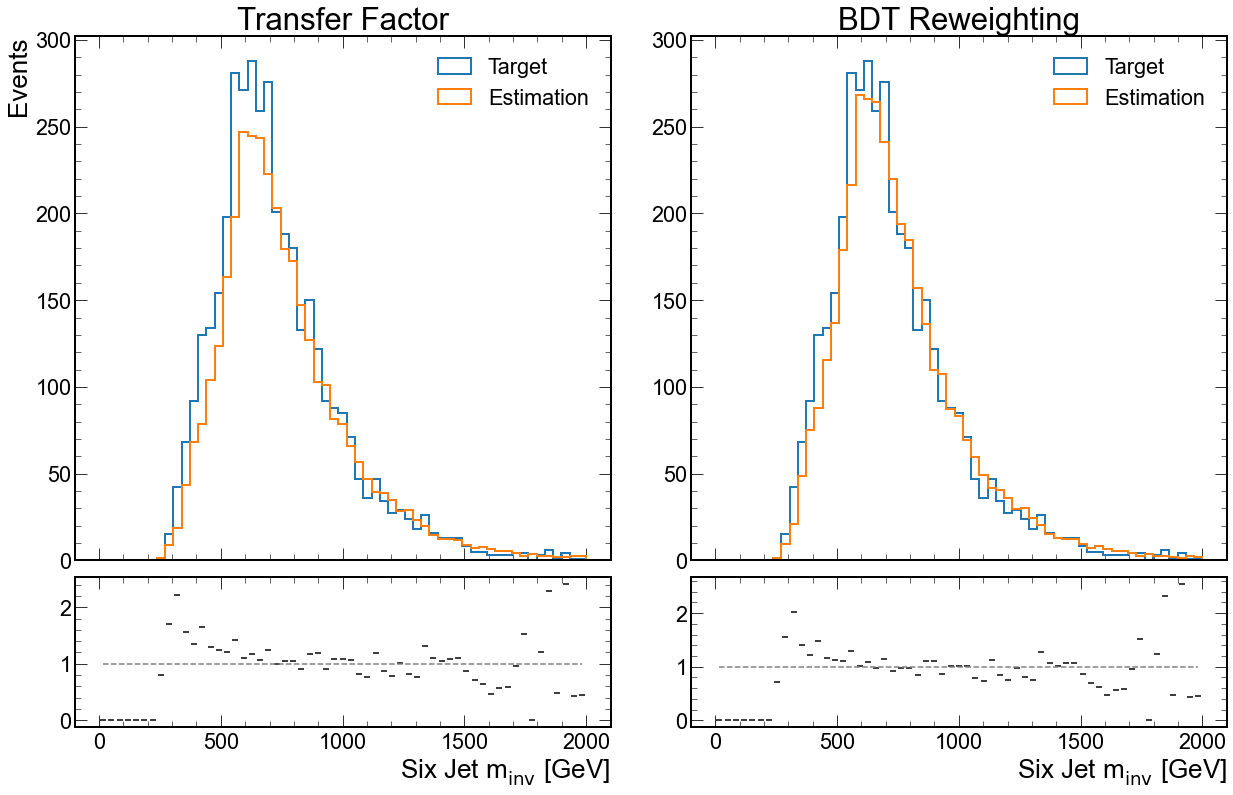

In [69]:
# start with a square Figure
fig = plt.figure(figsize=(20, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 1), height_ratios=(7, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.05)

ax = fig.add_subplot(gs[0,0])

ax.set_title("Transfer Factor")

n_VRhs, e = Hist(X.m[dat_VRhs_mask], bins=mBins, ax=ax, label='Target')
n_VRls, e = np.histogram(X.m[dat_VRls_mask].to_numpy(), bins=mBins)
n_VRls_TF, e = Hist(x_bins(mBins), weights=n_VRls*TF, bins=mBins, ax=ax, label='Estimation')

ax.set_ylabel('Events')
ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,0], sharex=ax)

ratio = np.where(n_VRls_TF != 0, n_VRhs/n_VRls_TF, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.plot(x_bins(e), np.ones_like(x_bins(e)), color='grey', linestyle='--')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

ax = fig.add_subplot(gs[0,1])

ax.set_title("BDT Reweighting")

n_VRhs, e = Hist(X.m[dat_VRhs_mask], bins=mBins, ax=ax, label='Target')
n_VRls_transformed, e = Hist(X.m[dat_VRls_mask], weights=weights_pred, bins=mBins, ax=ax, label='Estimation')

ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,1], sharex=ax)

ratio = np.where(n_VRls_transformed != 0, n_VRhs/n_VRls_transformed, 0)
ax.scatter(x_bins(e), ratio, marker='_', color='k')
ax.plot(x_bins(e), np.ones_like(x_bins(e)), color='grey', linestyle='--')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

plt.tight_layout()

fig.savefig("plots/Data/VR_BDT.pdf", bbox_inches='tight')